In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 1000x700 with 0 Axes>

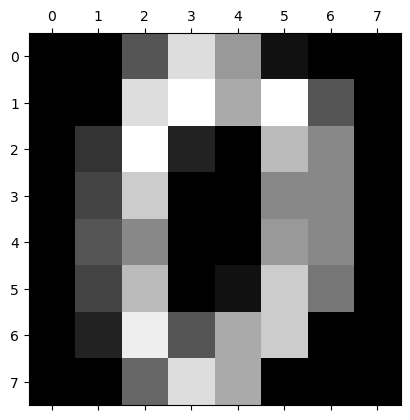

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.gray()
plt.matshow(digits.images[0])

In [9]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
df['target']=digits.target

In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'),df['target'],test_size=0.2)

In [14]:
x_train.shape

(1437, 64)

In [15]:
x_test.shape

(360, 64)

In [77]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)

In [78]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [79]:
model.score(x_test,y_test)

0.9805555555555555

In [80]:
y_pred = model.predict(x_test)

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[35,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 32,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

Text(95.72222222222221, 0.5, 'Truth')

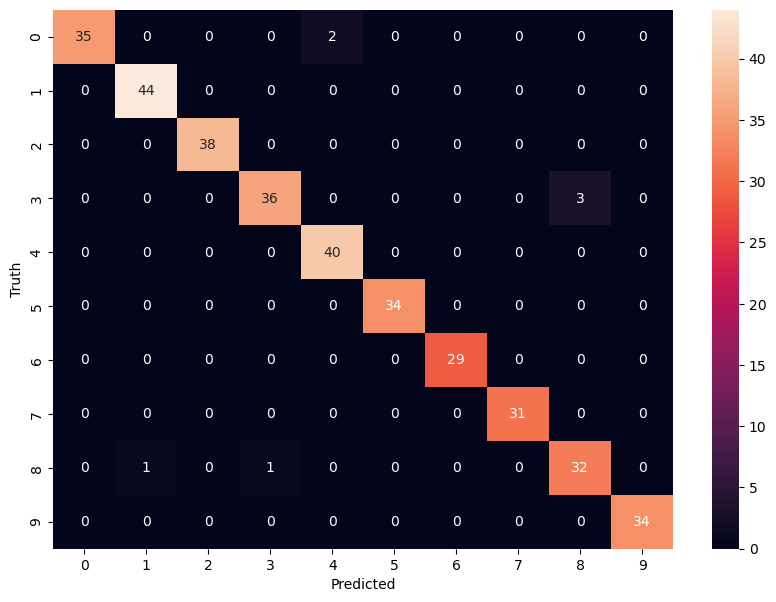

In [83]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Example

In [84]:
from sklearn.datasets import load_iris
iris = load_iris()

In [87]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [90]:
data = pd.DataFrame(iris.data,columns=iris.feature_names)

In [92]:
data['target'] = iris.target

In [93]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(data.drop(['target'],axis='columns'),data.target,test_size=0.2)

In [95]:
xtrain.shape

(120, 4)

In [96]:
xtest.shape

(30, 4)

In [124]:
model1 = RandomForestClassifier(n_estimators=40)
model1.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=40)

In [125]:
model1.score(xtest,ytest)

0.9666666666666667

# Compare models

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [128]:
lin_sc = cross_val_score(LinearRegression(),iris.data,iris.target)
dec_sc = cross_val_score(DecisionTreeClassifier(),iris.data,iris.target)
svc_sc = cross_val_score(SVC(),iris.data,iris.target)
rnf_sc = cross_val_score(RandomForestClassifier(),iris.data,iris.target)

In [129]:
import numpy as np
lin_sc = np.average(lin_sc)
dec_sc = np.average(dec_sc)
svc_sc = np.average(svc_sc)
rnf_sc = np.average(rnf_sc)

In [130]:
lin_sc

0.32256072489000837

In [131]:
dec_sc

0.9600000000000002

In [132]:
svc_sc

0.9666666666666666

In [133]:
rnf_sc

0.9666666666666668